<font size='6'>UJI Statistik</font><br>

---

<img src="https://www.its.ac.id/wp-content/uploads/2017/10/D3-STATISTIKA.jpg" height='400'>
<font size='3'><br>
By : Muhammad Audri Indraputra</font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns

<font size='5'>**LATIHAN 1**

In [2]:
A = np.array([27, 29, 27, 32, 34, 38, 39, 27, 30, 32, 34, 36, 38, 40])
B = np.array([28, 30, 29, 35, 34, 37, 39, 28, 30, 32, 33, 35, 39, 39])

In [3]:
len(A) == len(B)

True

<font size='4'>**Uji Normalitas**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


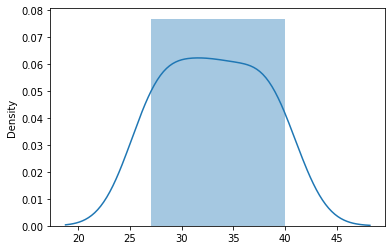

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


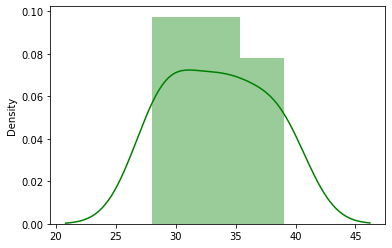

In [4]:
sns.distplot(A)
plt.show()
sns.distplot(B, color='green')
plt.show()

<font size='3'>
Berdasarkan grafik tersebut, yaitu data banyak berkumpul disekitar median, sehingga dapat disimpulkan berdistribusi normal

<font size='4'>**Uji Komogorov-Smirnov**

In [5]:
z_score_A = stats.zscore(A)
z_score_B = stats.zscore(B)

print('uji kolmogorov smirnov data A = ', stats.kstest(z_score_A, "norm"))
print('uji kolmogorov smirnov data B = ', stats.kstest(z_score_B, "norm"))

uji kolmogorov smirnov data A =  KstestResult(statistic=0.15010032999139777, pvalue=0.9106696943287013)
uji kolmogorov smirnov data B =  KstestResult(statistic=0.16609147661220497, pvalue=0.8346609194732189)


<font size='3'>A dan B memiliki p-value > 0.005, sehingga H0 diterima yang membuktikan A dan B berdistribusi normal

<font size='4'>**Independent Sample T-Test (Parametik)**

<font size='3'>
H0 = Tidak ada perbedaan yang signifikan <br>
H1 = Ada perbedaan yang signifika<br><br>

Toleransi > 0.05

In [6]:
t_value = stats.ttest_ind(A, B)
print(f'Hasil uji T-Test :\n{t_value}')

Hasil uji T-Test :
Ttest_indResult(statistic=-0.21626215417063352, pvalue=0.8304712072353047)


<font size='3'>P-Value = 0.83 > 0.05, sehingga H0 diterima dengan alasan tidak ada perbedaan yang signifikan antara jumlah A dan B

<font size='4'>**Uji Mann-Whitney**</font><br><br>

<font size='3'>Pengujian dilakukan untuk data yang tidak berdistribusi normal dan 2 kelompok independent.

In [7]:
stats.mannwhitneyu(A, B)

MannwhitneyuResult(statistic=91.0, pvalue=0.38212917802691737)

---

<font size='5'>LATIHAN 2</font><br><br>

<font size='3'>Kesimpulannya ialah:<br>

A dan B ialah berdistribusi normal dan dapat dilihat dari grafik distribusi yang cembung keatas di tengah, nilai p-value A dan B yang tergolong dapat diterima (diatas nilai penolakan) dengan menggunakan Uji Komogorov-Smirnov, dan nilai p-value hubungan antara A dan B yang dapat diterima (diatas penolakan) dengan menggunakan T-Test dan Uji mann-Whitney.

---

<font size='5'>LATIHAN 3<br><br></font>

<font size='4'>Coba simpulkan apakah artinya data berdistribusi normal?<br><br>

Jawab :

In [9]:
url = 'https://drive.google.com/file/d/1PskhCnLjC93KXpOxwUBKcBMvZ5uZEocT/view?usp=sharing'
url = 'https://drive.google.com/uc?id='+ url.split('/')[-2]
final_exam = pd.read_csv(url)

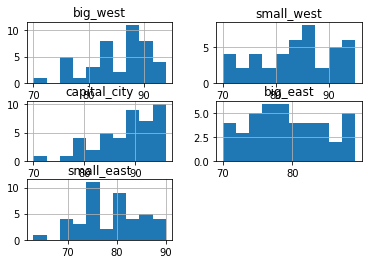

In [10]:
final_exam.hist()
plt.show()

<font size='3'>Dapat dilihat dengan menggunakan grafik bahwa seluruhnya besar kemungkinan tidak berdistribusi normal, tetapi perlu ditinjau dengan beberapa metode.<br><br>

Dengan menggunakan uji Kolmogorov-Smirnov sebagai berikut.

In [11]:
area = ['big_west', 'small_west', 'capital_city', 'small_east', 'big_east']
for a in area:
  z_score = stats.zscore(final_exam[a])
  normality = stats.kstest(z_score, 'norm', )
  print('normality for ', a, '=', normality)

normality for  big_west = KstestResult(statistic=0.1463623852887705, pvalue=0.2875537193189711)
normality for  small_west = KstestResult(statistic=0.09305748870693209, pvalue=0.8504695155077621)
normality for  capital_city = KstestResult(statistic=0.1723544820281414, pvalue=0.13793715190373557)
normality for  small_east = KstestResult(statistic=0.11522951440351409, pvalue=0.5926673369890815)
normality for  big_east = KstestResult(statistic=0.09709346617838455, pvalue=0.8123161041508566)


<font size='3'>Dapat dilihat bahwa nilai p-value keseluruhan kota ialah > 0.05, sehingga seluruh kota berdistribusi normal.

<font size='4'>**Uji Homogenitas**<br><br>

</font><font size='3'>H0 = Varians semua kelompok cendrung sama (homogen)<br>
H1 = Varians semua kelompok cendrung tidak sama (heterogen)

In [12]:
stats.levene(final_exam['big_west'], final_exam['small_west'], final_exam['capital_city']
             , final_exam['small_east'], final_exam['big_east'])

LeveneResult(statistic=0.5104303607286808, pvalue=0.728125042716542)

<font size='3'>Karena p-value > 0.05, maka H0 diterima, sehingga homogenitas ANOVA sudah terpenuhi.

<font size='4'>**Uji ANOVA (parametik)**<br><br>

</font><font size='3'>
H0 = Kualitas pendidikan merata di setiap wilayahnya<br>
H1 = Kualitas pendidikan tidak merata di setiap wilayah

In [13]:
stats.f_oneway(final_exam['big_west'], final_exam['small_west'], final_exam['capital_city']
             , final_exam['small_east'], final_exam['big_east'])

F_onewayResult(statistic=18.48895253915249, pvalue=4.945434101915241e-13)

<font size='3'>Karena p-value = 4.95 * 10^(-13) < 0.05, maka Ho ditolak, ternyata kualitas pendidikan di setiap wilayah belum merata. Perlu diselidiki wilayah dengan rata-rata terendah agar kualitas sarana pendidikan dan gurunya bisa ditingkatkan.

In [14]:
final_exam.describe()

,big_west,small_west,capital_city,big_east,small_east
count,43.000000,43.000000,43.000000,43.000000,43.000000
mean,85.325581,83.837209,88.232558,79.209302,78.627907
std,5.982995,7.006562,6.159921,5.667611,6.302015
min,70.000000,70.000000,70.000000,70.000000,63.000000
25%,82.000000,78.500000,85.000000,75.000000,75.000000
50%,87.000000,84.000000,90.000000,78.000000,80.000000
75%,90.000000,89.500000,93.000000,83.000000,83.000000
max,94.000000,95.000000,96.000000,89.000000,90.000000


<font size='3'>Ternyata nilai rata-rata di ibukota jauh diatas wilayah lain, sementara kota kecil di timur mendapat nilai rata-rata terkecil. Sebagai menteri pendidikan berarti kamu harus membuat program untuk membangun sarana pendidikan yang lebih baik dan mengirim guru-guru terbaik ke kota kecil di wilayah timur.

---

<font size='5'>LATIHAN 4<br><br>
<font size='4'>**Uji Kruskal-Wallis (non-parametik)**<br><br>

<font size='3'>
Digunakan Uji Kruskal Wallis apabila data tidak berdistribusi normal atau tidak homogen.

In [15]:
stats.kruskal(final_exam['big_west'], final_exam['small_west'], final_exam['capital_city']
             , final_exam['small_east'], final_exam['big_east'])

KruskalResult(statistic=57.244594069662135, pvalue=1.0992920086269013e-11)

<font size='3'>
Karena p-value = 1.0993 * 10^(-11) < 0.05 artinya: Ho ditolak berarti ada perbedaan yang signifikan untuk kualitas di antar wilayah.

---

<font size='5'>LATIHAN TAMBAHAN<br><br>

<font size='3'>
Misalkan kamu adalah data scientist di gojek. Kamu ingin mengetahui apakah kemacetan mempengaruhi tingkat kepuasan pelanggan. Jadi kamu ingin memebandingkan nilai "bintang" dari customer saat dia order di jam macet dan tidak macet. (#hint = data dari customer yang sama)<br><br>

macet = [2, 3, 5, 4, 5, 4, 4, 3, 4, 3, 4, 5, 4, 5, 4, 3, 4, 3, 3, 5, 4, 3, 4, 3, 4, 3, 4, 4, 5]<br><br>

tidak_macet = [2, 2, 4, 5, 4, 3, 3, 3, 3, 3, 3, 4, 4, 5, 4, 3, 3, 2, 3, 4, 4, 3, 3, 3, 4, 3, 4, 3, 4]<br><br>

1. Buat hipotesisnya<br>
2. Lakukan uji asumsi normalitasnya<br>
3. Jika datanya normal lakukan uji parametrik, jika tidak berdistribusi normal lakukan uji nonparametrik<br>
4. Apa kesimpulan uji hipotesisnya?<br><br>

Jawab :

![]('https://i.pinimg.com/236x/2a/0a/39/2a0a3934bec9c39a4f6cd2241895f94d.jpg')

<font size='4'>Input Data

In [16]:
macet = np.array([2, 3, 5, 4, 5, 4, 4, 3, 4, 3, 4, 5, 4, 5, 4, 3, 4, 3, 3, 5, 4, 3, 4, 3, 4, 3, 4, 4, 5])

tidak_macet = np.array([2, 2, 4, 5, 4, 3, 3, 3, 3, 3, 3, 4, 4, 5, 4, 3, 3, 2, 3, 4, 4, 3, 3, 3, 4, 3, 4, 3, 4])

<font size='4'>**Uji Normalitas**<br><br></font>

<font size='3'>
H0 = Data berdistribusi normal<br>
H1 = Data tidak berdistribusi normal

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


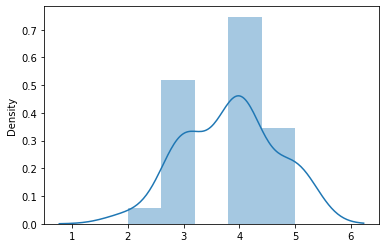

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


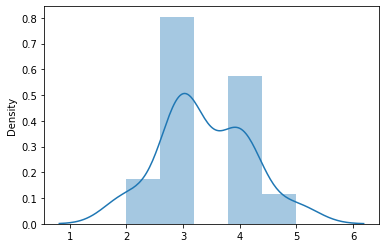

In [17]:
sns.distplot(macet)
plt.show()
sns.distplot(tidak_macet)
plt.show()

<font size='3'>Dari kedua grafik, ada kemungkinan tidak berdistribusi normal.

<font size='4'>**Uji normalitas dengan menggunakan Uji Kolmogorov Smirnov**

In [18]:
z_score_macet = stats.zscore(macet)
z_score_tidak_macet = stats.zscore(tidak_macet)
print('uji kolmogorov smirnov data Macet = ', stats.kstest(z_score_macet, "norm"))
print('uji kolmogorov smirnov data Tidak Macet = ', stats.kstest(z_score_tidak_macet, "norm"))

uji kolmogorov smirnov data Macet =  KstestResult(statistic=0.2414618941043637, pvalue=0.05668593129743599)
uji kolmogorov smirnov data Tidak Macet =  KstestResult(statistic=0.2769460572882385, pvalue=0.01855050750663906)


<Font size='3'>Dengan menggunakan Uji Kolomorov p-value untuk data Tidak Macet < 0.005, maka pengujian selanjutnya menggunakan data tidak berdistribusi normal.

<font size='4'>**Uji Mann-Whitney**</font><br><br>

<font size='3'>
Ada data yang tidak berdistribusi normal, sehingga dilakukan ke-independentan dengan Uji Mann-Whitney.<br><br>

H0 = Independent<br>
H1 = Tidak independet.

In [19]:
stats.mannwhitneyu(A, B)

MannwhitneyuResult(statistic=91.0, pvalue=0.38212917802691737)

<font size='3'>Dengan menggunakan Uji Mann-Whitney didapatkn p-value > 0.005, sehingga tidak terdapat perbedaan antara macet dan tidak macet